# Task 2: Customer Segmentation (Level 1)

## Step 1: Load and Explore Data

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

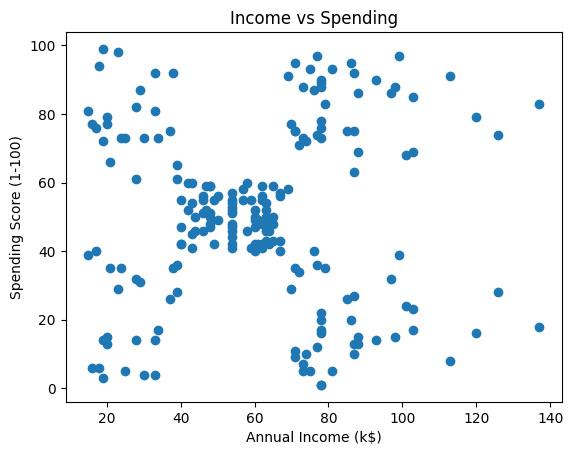

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('Mall_Customers.csv') n
# Explore data
print(df.head())
print(df.describe())

# Visualize 
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending')
plt.savefig('income_vs_spending.png')  # Save for submission
plt.show()

## Step 2: Preprocessing

In [3]:
# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check scaled data shape
print(X_scaled.shape)  

(200, 2)


## Step 3: Determine Optimal Clusters (Elbow Method)

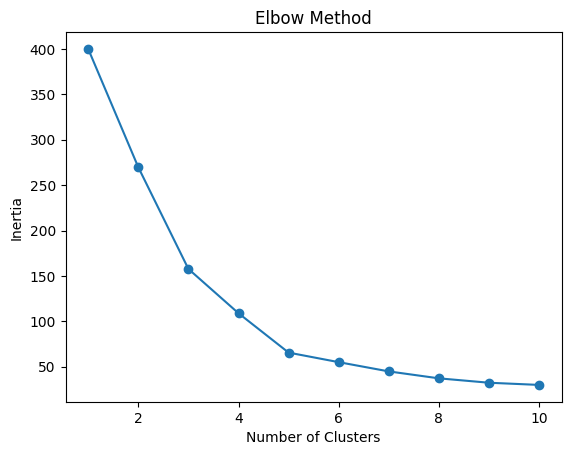

In [4]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig('elbow_method.png')  # Save for submission
plt.show()  

## Step 4: Apply K-Means and Visualize

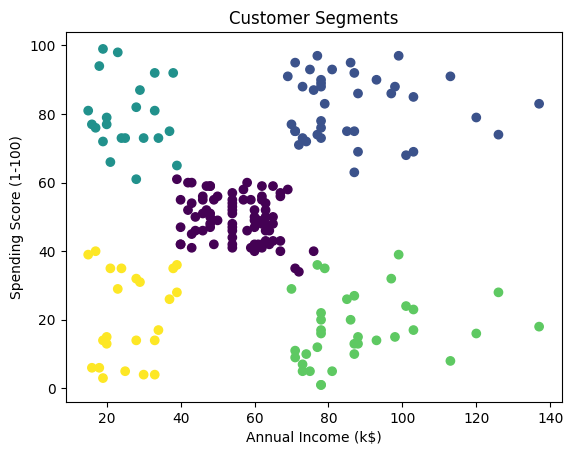

Silhouette Score: 0.55


In [5]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.savefig('customer_segments.png')  # Save for submission
plt.show()


from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')  

## Bonus Try DBSCAN

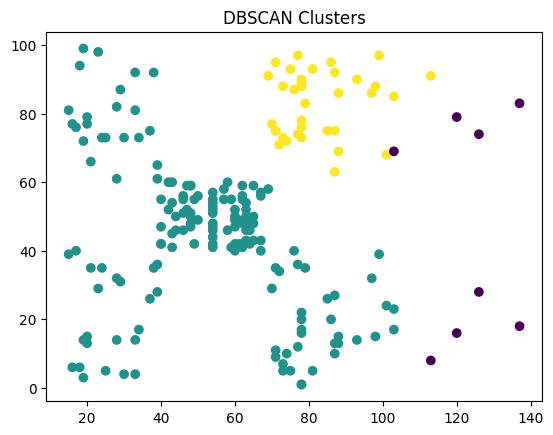

Average Spending per Cluster:
 Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clusters')
plt.savefig('dbscan_clusters.png')  # Save for submission
plt.show()

avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print('Average Spending per Cluster:\n', avg_spending)